In [2]:
import pathlib
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
DEVICE = torch.device("cpu")
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
elif torch.backends.mps.is_built() and torch.backends.mps.is_available():
    DEVICE = torch.device("mps")

In [4]:
# if running on my mac it sometimes needs this
if DEVICE == torch.device("mps"):
    DEVICE = torch.device("cpu")

In [ ]:
def load_models():
    plate_model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
    plate_model.load_state_dict(torch.load("plate_model.pth", map_location=DEVICE))
    plate_model.to(DEVICE)
    plate_model.eval()
    return [plate_model]

def process_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    return transform(image).to(DEVICE)

def plot_image(image_path, bbox):
    image = Image.open(image_path).convert("RGB")
    fig, ax = plt.subplots()
    ax.imshow(image)
    rectangle = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth = 2, edgecolor="tab:red")
    ax.add_patch(rectangle)
    ax.set_axis_off()
    plt.show()  

def crop_image(image_path, bbox):
    image = Image.open(image_path).convert("RGB")
    chopped = image.crop((bbox[0], bbox[1], bbox[2], bbox[3]))
    return chopped
    
def best_box(plate):
    best_idx = plate['scores'].argmax()  
    best_box = plate['boxes'][best_idx]
    return best_box.tolist()

/var/folders/hg/v42b6k995qddzwv77qmnn0zc0000gn/T/ipykernel_23550/1997587253.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  plate_model.load_state_dict(torch.load("plate

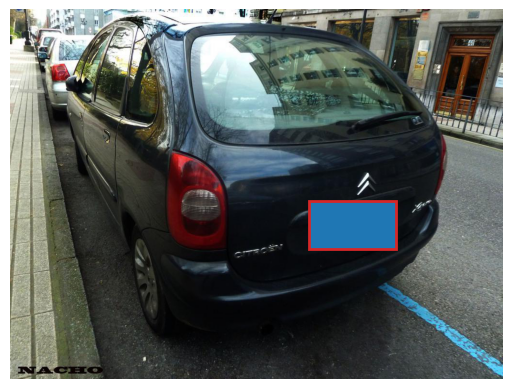

In [ ]:
image_path = "test3.jpg"
models = load_models()
plate_model = models[0]
image = process_image(image_path)

with torch.no_grad():
    plate_output = plate_model([image])[0]
bbox = best_box(plate_output)
plot_image(image_path, bbox)
license_plate = crop_image(image_path, bbox)

In [13]:
crop_image(image_path, bbox)